In [1]:
from controlsystems.system_examples import VerticalDrivingArm

# インスタンス化。引数を与えなければ定数部分は初期値が入る
arm_system = VerticalDrivingArm()

# どういう状態を保持するか？
print(arm_system.state_names)

# 定数の値を確かめる
print(arm_system.constants)

# 定数の値を変更する
arm_system.J = 23.0

print(arm_system.constants)

ModuleNotFoundError: No module named 'controlsystems'

In [2]:
from controlsystems import SystemSimulator, SystemController, ControlSystem
from controlsystems.main import Input
import numpy as np
from numpy import float64

class ConstantController(SystemController):
    """定数入力だけを与えるコントローラ"""

    def __init__(self, system : ControlSystem, input : float):
        self.system = system
        self.input = np.array([input])

    def control(self, t, x):
        return self.input

arm_controller = ConstantController(arm_system, 10.0)

arm_simulator = SystemSimulator(
    controller=arm_controller,
    initial_state=np.array([np.pi / 2, 0.0]),
    time_series=np.arange(0, 40, 0.1),
)

results = arm_simulator.run()

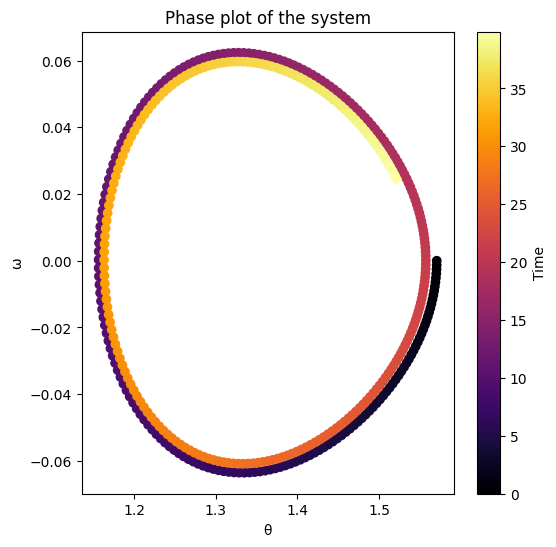

In [3]:

fig, _ = results.phase("θ", "ω")


In [7]:
from controlsystems.controller_examples import SingleInputPController

arm_controller = SingleInputPController(arm_system, np.array([0.0, 0.0]), np.array([2.9]))

TypeError: Can't instantiate abstract class SingleInputPController without an implementation for abstract method 'control'